## Slide to the left...

In [152]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import sys

In [132]:
elves = Path('elves.txt').read_text().split('\n')
elves = [[0 if char == '.' else '1' for char in line] for line in elves]


buffer = 10
width = len(elves[0])
height = len(elves)

elf_map = np.zeros((height+2*buffer, width + 2*buffer), dtype = 'u1')

elf_map[buffer:buffer+height, buffer:buffer+width] = np.array(elves)

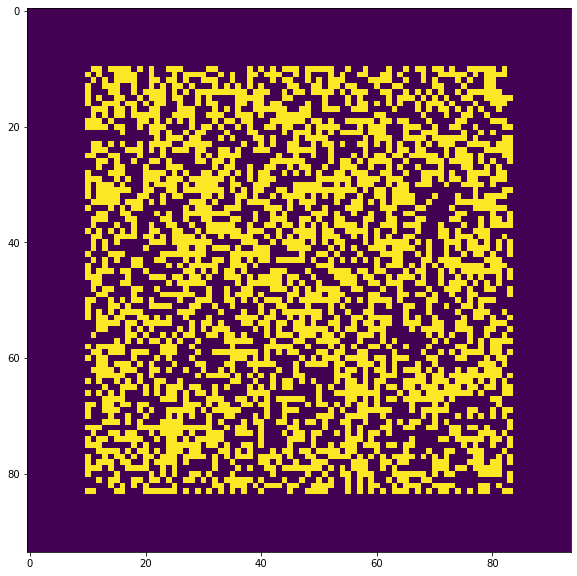

In [133]:
plt.figure(figsize = (10, 10))
plt.imshow(elf_map, aspect = 'equal', interpolation = 'none')

In [134]:
def get_proposal(y, x, current_map, directions):
    nw = current_map[y-1, x-1] == 0
    n = current_map[y-1, x] == 0
    ne = current_map[y-1, x+1] == 0
    e = current_map[y, x+1] == 0
    se = current_map[y+1, x+1] == 0
    s = current_map[y+1, x] == 0
    sw = current_map[y+1, x-1] == 0
    w = current_map[y, x-1] == 0
    
    proposals = []
    
    if nw and n and ne and e and se and s and sw and w:
        return [(y,x), (y,x)]
    
    if nw and n and ne:
        proposals += ['North']
    
    if ne and e and se:
        proposals += ['East']
    
    if se and s and sw:
        proposals += ['South']
        
    if sw and w and nw:
        proposals += ['West']
    
    for direction in directions:
        if direction in proposals:
            dy, dx = dydx[direction]
            
            return [(y,x), (y+dy, x + dx)]
        
    return [(y,x), (y,x)]

In [135]:
def update_map(moves, current_map):
    current_map = np.copy(current_map)
    
    origins = [move[0] for move in moves]
    dests = [move[1] for move in moves]
    
    unique_moves = [tuple(move) for move,count in zip(*np.unique(dests, axis = 0, return_counts = True)) if count == 1]
    
    for i in range(len(moves)):
        if dests[i] in unique_moves:
            current_map[dests[i]] = 1
            if dests[i] != origins[i]:
                current_map[origins[i]] = 0
            
    return current_map

In [136]:
directions = np.array(['North', 'South', 'West', 'East'])

dydx = {'North': [-1, 0], 'South': [1, 0], 'West': [0, -1], 'East': [0, 1]}

In [138]:
rounds = 10

current_map = np.copy(elf_map)

num_elves = np.sum(elf_map)

current_directions = np.copy(directions)

for i in range(rounds):
    # Get all elf poisitions
    coords = np.where(current_map == 1)
    # Get all elf proposed movements
    moves = [get_proposal(coords[0][j], coords[1][j], current_map, current_directions) for j in range(num_elves)]
    # Resolve all movements
    current_map = update_map(moves, current_map)
    
    # Shift priorities
    current_directions = np.roll(current_directions, -1)
    
y, x = np.where(current_map == 1)
print((max(y)-min(y)+1)*(max(x)-min(x)+1) - np.sum(current_map))

4195


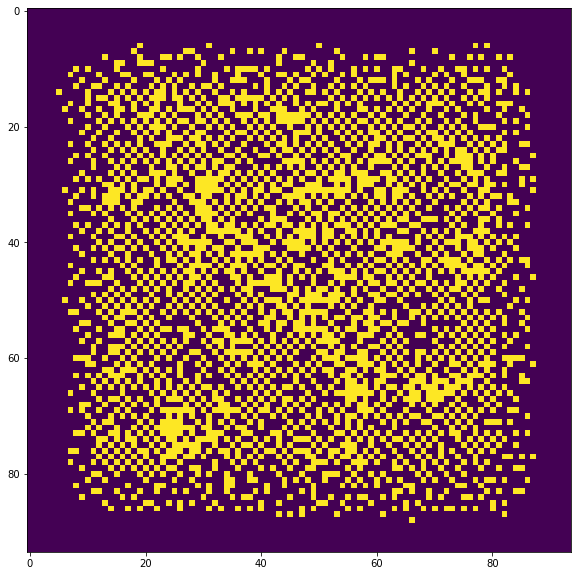

In [139]:
plt.figure(figsize = (10, 10))
plt.imshow(current_map, aspect = 'equal', interpolation = 'none')

## Time to get funky

In [156]:
elves = Path('elves.txt').read_text().split('\n')
elves = [[0 if char == '.' else '1' for char in line] for line in elves]


max_rounds = 5000
buffer = max_rounds
width = len(elves[0])
height = len(elves)

elf_map = np.zeros((height+2*buffer, width + 2*buffer), dtype = 'u1')

elf_map[buffer:buffer+height, buffer:buffer+width] = np.array(elves)

In [157]:
current_map = np.copy(elf_map)

num_elves = np.sum(elf_map)

current_directions = np.copy(directions)

for i in range(max_rounds):
    sys.stdout.write(f'\rRound {i+1:<10}')
    # Get all elf poisitions
    coords = np.where(current_map == 1)
    # Get all elf proposed movements
    moves = [get_proposal(coords[0][j], coords[1][j], current_map, current_directions) for j in range(num_elves)]
    # Resolve all movements
    new_map = update_map(moves, current_map)
    
    if np.all(new_map == current_map):
        break
    else:
        current_map = new_map
    
    # Shift priorities
    current_directions = np.roll(current_directions, -1)
    
y, x = np.where(current_map == 1)

Round 1069      

(4986.0, 5126.0)

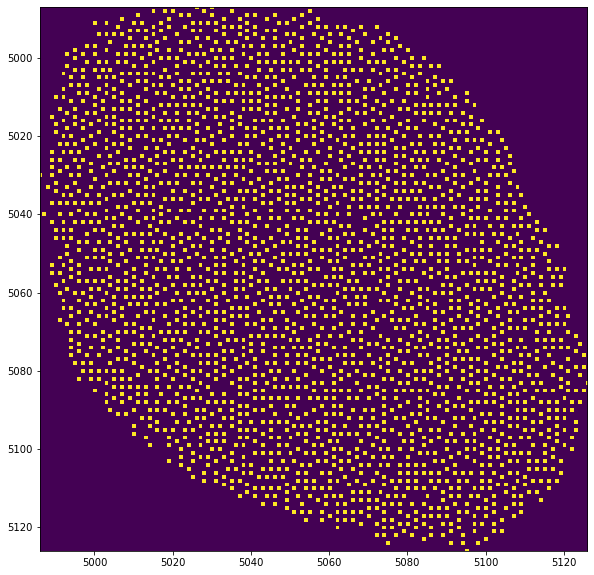

In [161]:
plt.figure(figsize = (10, 10))
plt.imshow(current_map, aspect = 'equal', interpolation = 'none')
plt.ylim(max(y), min(y))
plt.xlim(min(x), max(x))